In [20]:
import numpy as np
import pandas as pd
import random
import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml
from pathlib import Path

from util.functions import logistic
from structure_generation.path_connection_gen import ProceduralGraphGenerator, StatsUtils, GraphStructureGenerator




In [21]:

conf = yaml.safe_load(Path('config.yml').read_text())['reachability']


In [22]:
geometric_graph_conf = conf['random_geometric']

In [23]:
results_dict_list = []
modality = "reversable"
for graph_rad in geometric_graph_conf['graph_edge_radii']:
    results_dict = {
        "timesteps_saturation" : [],
        "fraction_infected_list" : [],
        "info_dict" : []
    }
    print(f"simulation run for graph radius {graph_rad}")
    mean_degree_simulation_runs = []
    for i, repeat in tqdm.tqdm(enumerate(range(conf['num_simulation_runs']))):
        graphgen = GraphStructureGenerator(
            structure_name=conf['structure_name'], 
            num_nodes=int(geometric_graph_conf['nodes']), 
            graph_edge_radius = float(graph_rad)
        )
        graph = graphgen.initial_adj_matrix
        graph_rand = graphgen.get_graph_structure().initial_adj_matrix

        x = ProceduralGraphGenerator(graph)
        infection_matrix_list, timesteps_saturation, fraction_infected_list, info_dict = x.infect_till_saturation(
            modality=modality, verbose= False
        )

        results_dict["timesteps_saturation"].append(timesteps_saturation)
        results_dict["fraction_infected_list"].append(fraction_infected_list)
        results_dict["info_dict"].append(info_dict)
    
    results_dict_list.append(results_dict)

simulation run for graph radius 0.025


5it [00:00, 42.46it/s]


simulation run for graph radius 0.05


5it [00:20,  4.15s/it]


In [25]:
import itertools
for result in tqdm.tqdm(results_dict_list): 
    for key in result.keys():
        if key == "fraction_infected_list":
            # Pad the list to ones to the longest saturation length, find the mean across all simulations and the std at each timestep
            padded_list = np.array(
                list(zip(*itertools.zip_longest(*result[key], fillvalue=1)))
            )
            result[key] = np.mean(padded_list, axis=0)
        if key == "info_dict":
            info_dict_temp = {k : None for k in result['info_dict'][0].keys()}
            for key in info_dict_temp.keys():
                if key == "modality":
                    info_dict_temp[key] = result['info_dict'][0]['modality']
                else:
                    info_dict_temp[key] = np.average([x[key] for x in result['info_dict']])
            result['info_dict'] = info_dict_temp
        
    result['average_timesteps'] = np.average(result['timesteps_saturation'])

100%|██████████| 2/2 [00:00<00:00, 670.18it/s]


run statistics
{'average_degree': 2.2112332112332114, 'num_nodes': 9.6, 'modality': 'causal', 'clustering_coefficient': 0.273960113960114, 'degree_assortivity': -0.21165561583283105, 'mean_shortest_pathlength': 2.738156288156288}


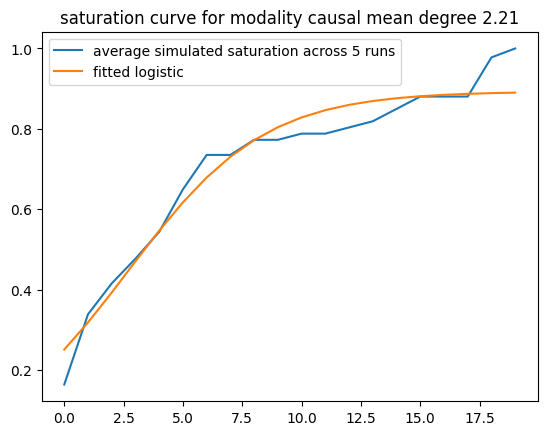

run statistics
{'average_degree': 4.029540574141049, 'num_nodes': 172.4, 'modality': 'causal', 'clustering_coefficient': 0.5170457851120147, 'degree_assortivity': 0.5740895240563753, 'mean_shortest_pathlength': 15.169411728137835}


/home/cm2435/Desktop/graph_transmittion_research_project/util/functions.py:4: RuntimeWarning: overflow encountered in exp
  return A / (1.0 + np.exp(-k * (x - x0)))


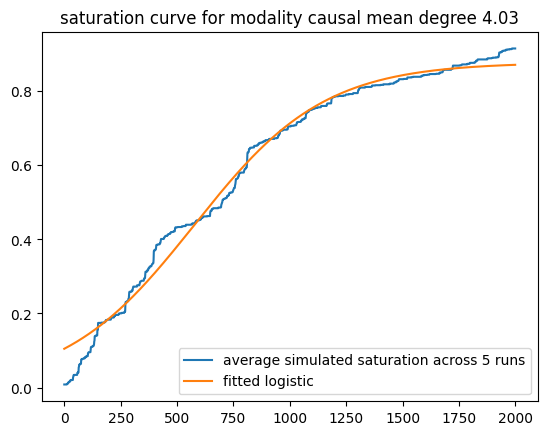

In [32]:
for result in results_dict_list: 
    timesteps_list = [x for x in range(len(result['fraction_infected_list']))]

    p, cov = curve_fit(logistic, timesteps_list, result['fraction_infected_list'])
    logistic_curve_data = logistic(timesteps_list, *p)
    print("run statistics")
    print(result['info_dict'])
    plt.plot(timesteps_list, result['fraction_infected_list'], label = f"average simulated saturation across {len(result['timesteps_saturation'])} runs")
    plt.plot(timesteps_list, logistic_curve_data, label = "fitted logistic")
    plt.title(f"saturation curve for modality {result['info_dict']['modality']} mean degree {round(result['info_dict']['average_degree'], 2)}")
    plt.legend()
    plt.show()

In [34]:
results_dict_list = []
modality = "irreversable"
for graph_rad in geometric_graph_conf['graph_edge_radii']:
    results_dict = {
        "timesteps_saturation" : [],
        "fraction_infected_list" : [],
        "info_dict" : []
    }
    print(f"simulation run for graph radius {graph_rad}")
    mean_degree_simulation_runs = []
    for i, repeat in tqdm.tqdm(enumerate(range(conf['num_simulation_runs']))):
        graphgen = GraphStructureGenerator(
            structure_name=conf['structure_name'], 
            num_nodes=int(geometric_graph_conf['nodes']), 
            graph_edge_radius = float(graph_rad)
        )
        graph = graphgen.initial_adj_matrix
        graph_rand = graphgen.get_graph_structure().initial_adj_matrix

        x = ProceduralGraphGenerator(graph)
        infection_matrix_list, timesteps_saturation, fraction_infected_list, info_dict = x.infect_till_saturation(
            modality=modality, verbose= False
        )

        results_dict["timesteps_saturation"].append(timesteps_saturation)
        results_dict["fraction_infected_list"].append(fraction_infected_list)
        results_dict["info_dict"].append(info_dict)
    
    results_dict_list.append(results_dict)

simulation run for graph radius 0.025


5it [00:00, 55.17it/s]


simulation run for graph radius 0.05


5it [00:12,  2.41s/it]


In [35]:
import itertools
for result in tqdm.tqdm(results_dict_list): 
    for key in result.keys():
        if key == "fraction_infected_list":
            # Pad the list to ones to the longest saturation length, find the mean across all simulations and the std at each timestep
            padded_list = np.array(
                list(zip(*itertools.zip_longest(*result[key], fillvalue=1)))
            )
            result[key] = np.mean(padded_list, axis=0)
        if key == "info_dict":
            info_dict_temp = {k : None for k in result['info_dict'][0].keys()}
            for key in info_dict_temp.keys():
                if key == "modality":
                    info_dict_temp[key] = result['info_dict'][0]['modality']
                else:
                    info_dict_temp[key] = np.average([x[key] for x in result['info_dict']])
            result['info_dict'] = info_dict_temp
        
    result['average_timesteps'] = np.average(result['timesteps_saturation'])

100%|██████████| 2/2 [00:00<00:00, 1179.17it/s]


run statistics
{'average_degree': 2.911111111111111, 'num_nodes': 7.8, 'modality': 'saturation', 'clustering_coefficient': 0.43513227513227515, 'degree_assortivity': -0.06925669571638264, 'mean_shortest_pathlength': 1.963809523809524}


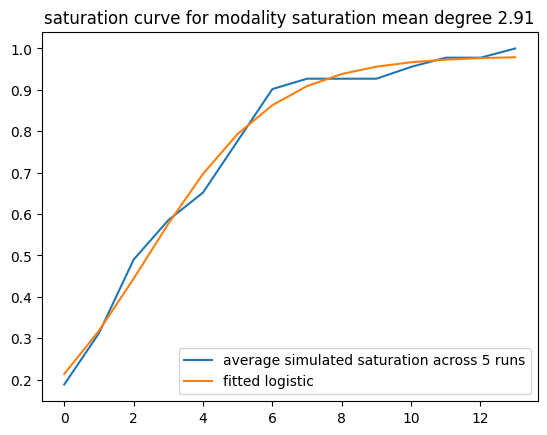

run statistics
{'average_degree': 4.085682198912066, 'num_nodes': 148.2, 'modality': 'saturation', 'clustering_coefficient': 0.541172953845925, 'degree_assortivity': 0.47630705915366595, 'mean_shortest_pathlength': 12.684780499020658}


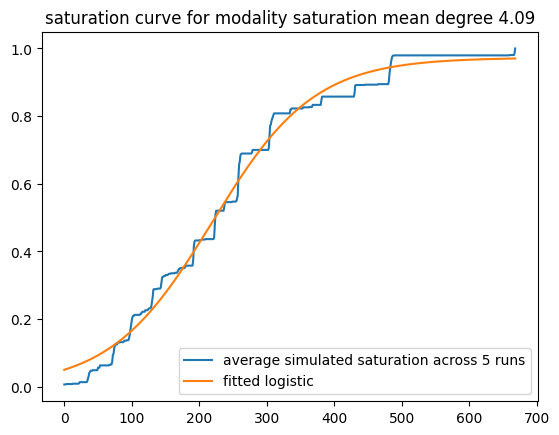

In [36]:
for result in results_dict_list: 
    timesteps_list = [x for x in range(len(result['fraction_infected_list']))]

    p, cov = curve_fit(logistic, timesteps_list, result['fraction_infected_list'])
    logistic_curve_data = logistic(timesteps_list, *p)
    print("run statistics")
    print(result['info_dict'])
    plt.plot(timesteps_list, result['fraction_infected_list'], label = f"average simulated saturation across {len(result['timesteps_saturation'])} runs")
    plt.plot(timesteps_list, logistic_curve_data, label = "fitted logistic")
    plt.title(f"saturation curve for modality {result['info_dict']['modality']} mean degree {round(result['info_dict']['average_degree'], 2)}")
    plt.legend()
    plt.show()

In [ ]:
try: 
            #Fit a logistic curve to the simulated infection data for one simulation run, generate data with this logistic, use to find residuals in fit
            p, cov = curve_fit(logistic, timesteps, fraction_infected_list)
            logistic_curve_data = logistic(timesteps, *p)
            residuals_dict[graph_rad].extend(fraction_infected_list - logistic_curve_data)
            mean_degree_simulation_runs.append(average_degree)
        except RuntimeError as e:
            print(e)
            pass 
    average_degrees.append(np.mean(mean_degree_simulation_runs))

#Update keys of dictionary so that keys are the (averaged) mean degree of the simulations networks
residuals_dict = {k : v for k,v in list(zip(average_degrees, residuals_dict.values()))}
least_noisy_data = residuals_dict
for key in residuals_dict.keys(): 
    sns.kdeplot(residuals_dict[key], label=f"mean degree : {round(key, 2)}")
plt.legend()
plt.show()